## Our Data Dictionary is as follows

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd

chunk = pd.read_csv('Fraud.csv',chunksize=100000)

In [2]:
df = chunk.get_chunk()

Getting the information about the datatypes and the different statistical parameters of the data

In [3]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB
None


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,8.499640,1.736022e+05,8.777575e+05,8.940619e+05,8.805048e+05,1.184041e+06,0.001160,0.0
std,1.825545,3.443003e+05,2.673284e+06,2.711318e+06,2.402267e+06,2.802350e+06,0.034039,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.274552e+04,2.006150e+04,0.000000e+00,2.083943e+04,4.990918e+04,0.000000,0.0
75%,10.000000,2.117631e+05,1.901920e+05,2.148132e+05,5.882724e+05,1.058186e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,0.0


Checking the Null values

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

As from the above test there are no null values in the dataset

Now we will check for the histogram of the dataset

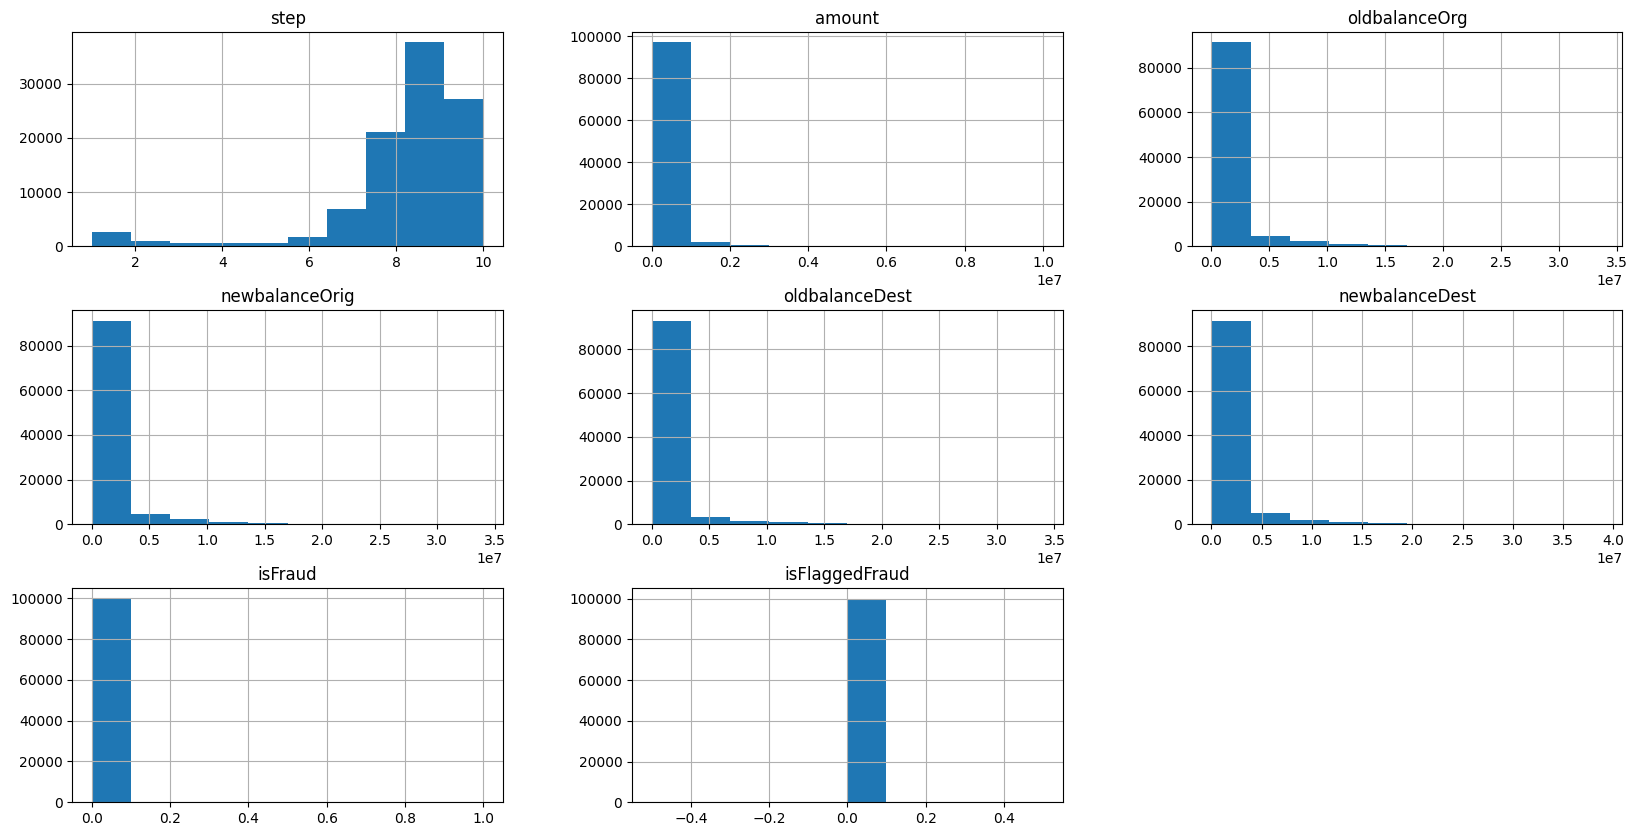

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist(figsize=(20,10))
plt.show()

As we can see most of the data of the columns are skewed to the left except for the column step.

next we will try to understand which customer(s)  had the most fraud

In [6]:
df[df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
77745,10,CASH_OUT,277970.88,C489647033,0.00,0.0,C571514738,0.00,277970.88,1,0
90070,10,TRANSFER,93810.76,C481501970,93810.76,0.0,C1262577882,0.00,0.00,1,0
90071,10,CASH_OUT,93810.76,C1190429229,93810.76,0.0,C2104652067,4096048.05,4189858.81,1,0
99371,10,TRANSFER,503405.88,C1446009472,503405.88,0.0,C2010733400,0.00,0.00,1,0


In [7]:
df[df['isFraud'] == 1]['nameOrig'].value_counts()

nameOrig
C1305486145    1
C1173659886    1
C1938531779    1
C74534388      1
C1026280121    1
              ..
C17222024      1
C2026325575    1
C540962910     1
C2044690596    1
C140359285     1
Name: count, Length: 116, dtype: int64

<Axes: xlabel='newbalanceDest'>

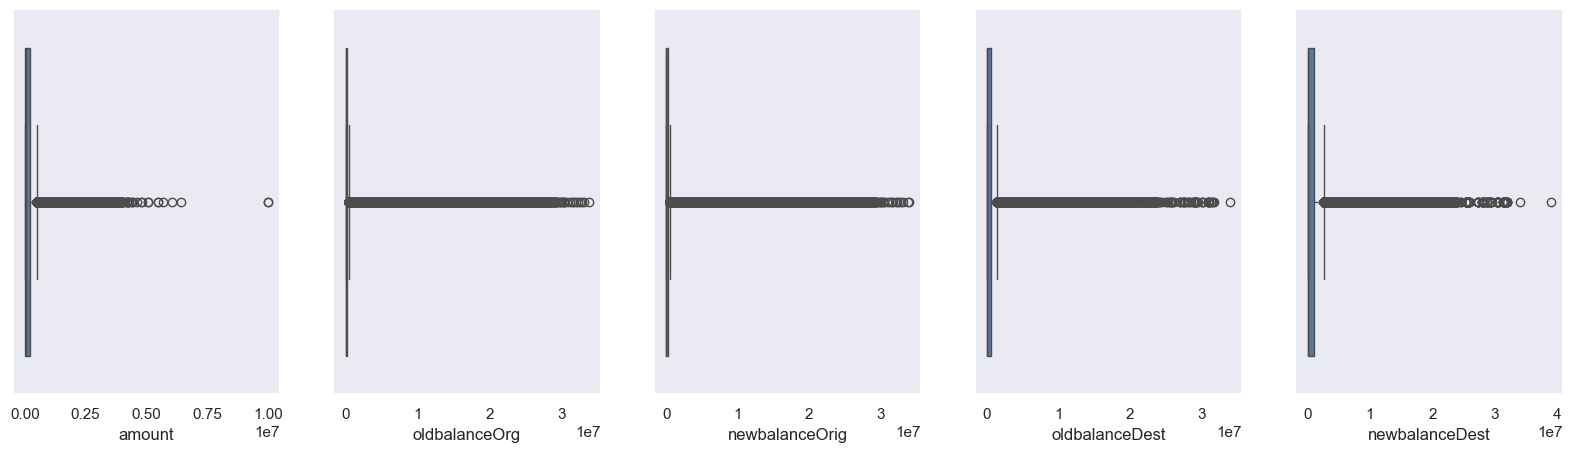

In [9]:
sns.set_theme(style='dark')
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(df['amount'],orient='h')
# There a value of amount which is greater than 1e7 which can be considered as outlier we will deal with that later
plt.subplot(1,5,2)
sns.boxplot(df['oldbalanceOrg'],orient='h')
plt.subplot(1,5,3)
sns.boxplot(df['newbalanceOrig'],orient='h')
plt.subplot(1,5,4)
sns.boxplot(df['oldbalanceDest'],orient='h')
#we can identify a single value that can be called as outlier
plt.subplot(1,5,5)
sns.boxplot(df['newbalanceDest'],orient='h')

# Also there are two values which can be considered as outliers



The above plot will help out determine the outliers. From the above observation we can see that many datapoints lie outside the 75 percentile range,
* further we will calculate the outlier available statistical methods

* One of the methods to check for outliers is to check whether the maximum values of the data in the columns are within the 3 times of their standard deviation, which we can check, but before that we will do a quick check of box plot for all the columns with continuous values

Now we will do a statistical analysis to perform the outlier detection

In [10]:
#by this method we will check highest and lowest values allowed

def high_low(data: pd.DataFrame, column:str):
    print(f"Highest allowed for {column}","{:e}".format((data[column].mean() + 3*df[column]).std()))
    print(f"Lowest allowed for {column}","{:e}".format(data[column].mean() - 3*df[column].std()))

In [11]:
high_low(df,'amount')

high_low(df,'oldbalanceDest')

high_low(df,'oldbalanceOrg')

high_low(df,'newbalanceOrig')

high_low(df,'newbalanceDest')

high_low(df,'step')

Highest allowed for amount 1.032901e+06
Lowest allowed for amount -8.592987e+05
Highest allowed for oldbalanceDest 7.206802e+06
Lowest allowed for oldbalanceDest -6.326297e+06
Highest allowed for oldbalanceOrg 8.019853e+06
Lowest allowed for oldbalanceOrg -7.142096e+06
Highest allowed for newbalanceOrig 8.133953e+06
Lowest allowed for newbalanceOrig -7.239892e+06
Highest allowed for newbalanceDest 8.407049e+06
Lowest allowed for newbalanceDest -7.223008e+06
Highest allowed for step 5.476634e+00
Lowest allowed for step 3.023006e+00


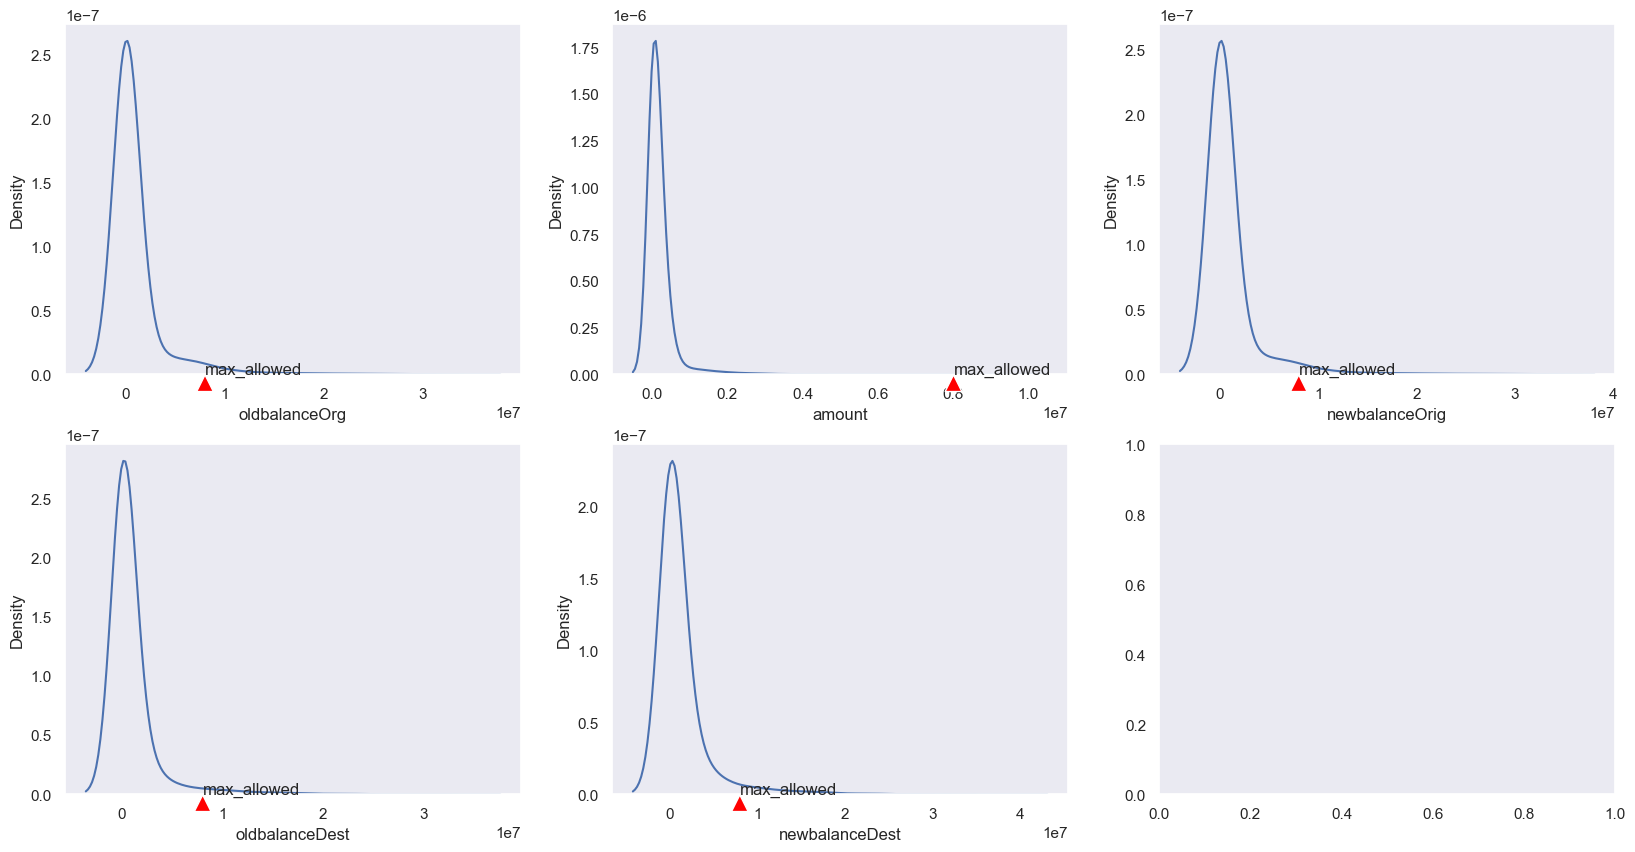

In [12]:
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.kdeplot(df,x='oldbalanceOrg',bw_adjust=5,ax=axs[0,0])
axs[0,0].annotate('max_allowed', xy=(8.019853e+06, 0),arrowprops=dict(facecolor='red', shrink=0.2))
sns.kdeplot(df,x='amount',bw_adjust=5,ax=axs[0,1])
axs[0,1].annotate('max_allowed', xy=(8.019853e+06, 0),arrowprops=dict(facecolor='red', shrink=0.2))
sns.kdeplot(df,x='newbalanceOrig',bw_adjust=5,ax=axs[0,2])
axs[0,2].annotate('max_allowed', xy=(8.019853e+06, 0),arrowprops=dict(facecolor='red', shrink=0.2))
sns.kdeplot(df,x='oldbalanceDest',bw_adjust=5,ax=axs[1,0])
axs[1,0].annotate('max_allowed', xy=(8.019853e+06, 0),arrowprops=dict(facecolor='red', shrink=0.2))
sns.kdeplot(df,x='newbalanceDest',bw_adjust=5,ax=axs[1,1])
axs[1,1].annotate('max_allowed', xy=(8.019853e+06, 0),arrowprops=dict(facecolor='red', shrink=0.2))
plt.show()

By plotting the max upper limit in the above kernel density graph, we can visually assume that removing those data points can help the datapoints follow the normal curve
* since there are no abnormal low values we will only work with the higher values

In [13]:
# Here we get these values from the output of the function above

new_df = df[((df['amount']<1.032901e+06) & 
             (df['oldbalanceDest']<7.206802e+06) & 
             (df['oldbalanceOrg']<8.019853e+06) & 
             (df['newbalanceOrig']<8.133953e+06) & 
             (df['newbalanceDest']<8.407049e+06))].copy()

new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


lets plot the boxplot again

<Axes: xlabel='newbalanceDest'>

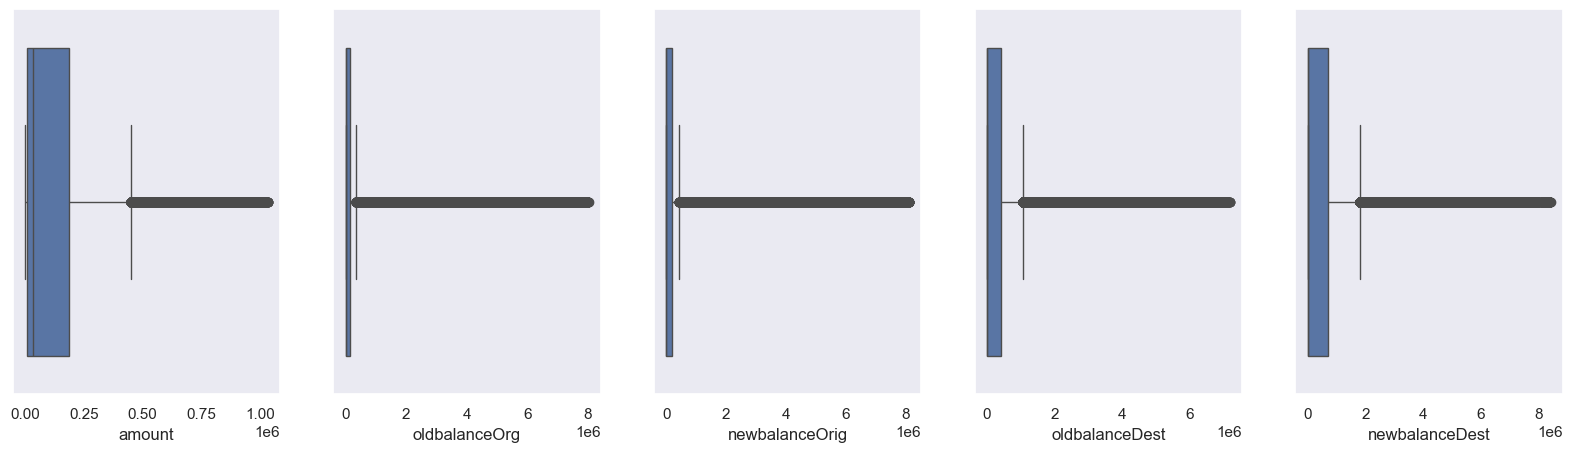

In [14]:
sns.set_theme(style='dark')
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.boxplot(new_df['amount'],orient='h')
# There a value of amount which is greater than 1e7 which can be considered as outlier we will deal with that later
plt.subplot(1,5,2)
sns.boxplot(new_df['oldbalanceOrg'],orient='h')
plt.subplot(1,5,3)
sns.boxplot(new_df['newbalanceOrig'],orient='h')
plt.subplot(1,5,4)
sns.boxplot(new_df['oldbalanceDest'],orient='h')
#we can identify a single value that can be called as outlier
plt.subplot(1,5,5)
sns.boxplot(new_df['newbalanceDest'],orient='h')

We can clearly see that no such outliers are visible

we will redo the kde plot to reconfirm



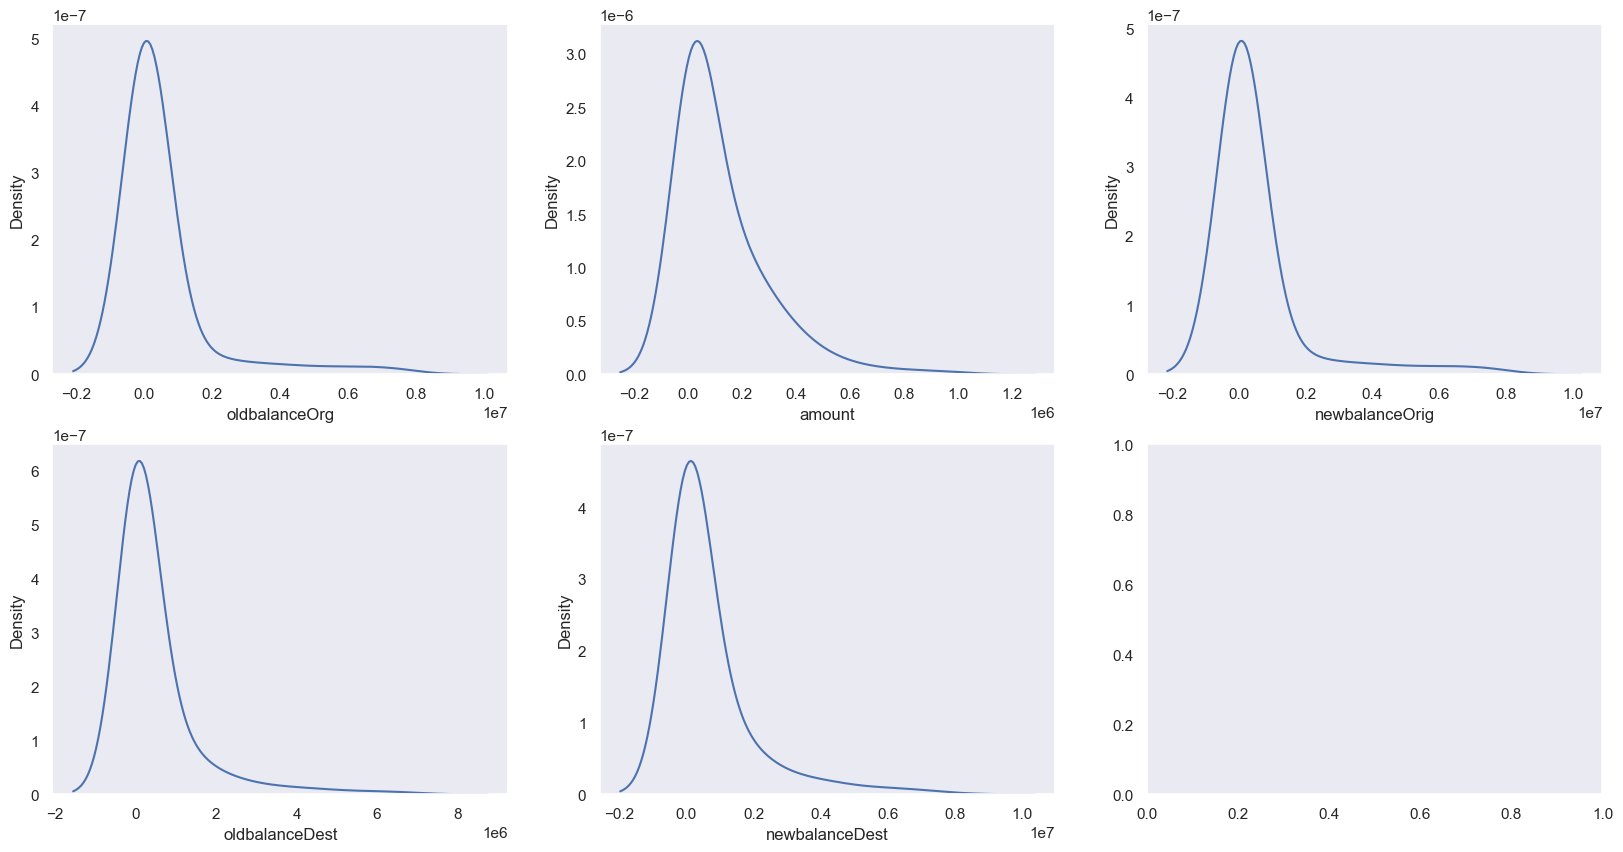

In [15]:
fig,axs = plt.subplots(nrows=2,ncols=3,figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.kdeplot(new_df,x='oldbalanceOrg',bw_adjust=5,ax=axs[0,0])
sns.kdeplot(new_df,x='amount',bw_adjust=5,ax=axs[0,1])
sns.kdeplot(new_df,x='newbalanceOrig',bw_adjust=5,ax=axs[0,2])
sns.kdeplot(new_df,x='oldbalanceDest',bw_adjust=5,ax=axs[1,0])
sns.kdeplot(new_df,x='newbalanceDest',bw_adjust=5,ax=axs[1,1])
plt.show()

If we compare the above graph with previous curves we can see that we have the data that follows the bell curve

Now we will check for multicolinearity in the dataset

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Here we will only take the columns with the numerical values, because multicolinearity exists between columns with continuous values and not with object types

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].values, i) for i in range(new_df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].shape[1])]
vif["features"] = 'step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'

print(vif)

   VIF Factor        features
0    1.692554            step
1    1.981730          amount
2  230.364312   oldbalanceOrg
3  231.666931  newbalanceOrig
4    5.959227  oldbalanceDest
5    6.648290  newbalanceDest


From the above VIF calculation we can see that oldbalanceOrg and newbalanceOrig both have exorbitantly high values of VIF, this indicates that these two columns have high multicollinearity. Also VIF values above 5 are expected to be highly multicollinear.

To alleviate this problem we can try some feature engineering where we will just keep the balance by performing newbalanceOrig-oldbalanceOrg and name that column as balanceOrig and newbalanceDest-oldbalanceDest as balanceDest

In [17]:
new_df['balanceOrig'] = new_df['newbalanceOrig']-new_df['oldbalanceOrg']
new_df['balanceDest'] = new_df['newbalanceDest']-new_df['oldbalanceDest']

In [18]:
new_df.head()

#we can see that out balanceDest have too many zeroes in the values and hence can cause trouble calculating VIF and hence we will add 1 to each value, which will not disturb the data at all


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig,balanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [19]:
new_df['balanceDest'] = new_df['balanceDest'].apply(lambda x: x+1)

We will do the VIF again and check how the VIF values come

In [20]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Here we will only take the columns with the numerical values, because multicolinearity exists between columns with continuous values and not with object types

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_df[['step','amount','balanceOrig','balanceDest']].values, i) for i in range(new_df[['step','amount','balanceOrig','balanceDest']].shape[1])]
vif["features"] = 'step','amount','balanceOrig','balanceDest'

print(vif)

   VIF Factor     features
0    1.559209         step
1    1.839169       amount
2    1.090477  balanceOrig
3    1.309471  balanceDest


### From the above VIF values we can safely say that we have removed multicollinearity and hence we will drop the two columns we feature engineered with

In [21]:
new_1_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud'], axis=1).copy()

In [22]:
new_1_df.head()

,step,type,amount,nameOrig,nameDest,isFraud,balanceOrig,balanceDest
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,-9839.64,1.0
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,-1864.28,1.0
2,1,TRANSFER,181.00,C1305486145,C553264065,1,-181.00,1.0
3,1,CASH_OUT,181.00,C840083671,C38997010,1,-181.00,-21181.0
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,-11668.14,1.0


Checking if all the names are unique and if there is no duplicates

In [23]:
new_1_df['nameOrig'].value_counts().sum() == new_1_df.shape[0]

True

In [24]:
new_1_df['nameDest'].value_counts().sum() == new_1_df.shape[0]

True

Hence we can remove the nameOrig and nameDest columns

In [25]:
new_1_df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

Now checking with the transaction types

<Axes: xlabel='type'>

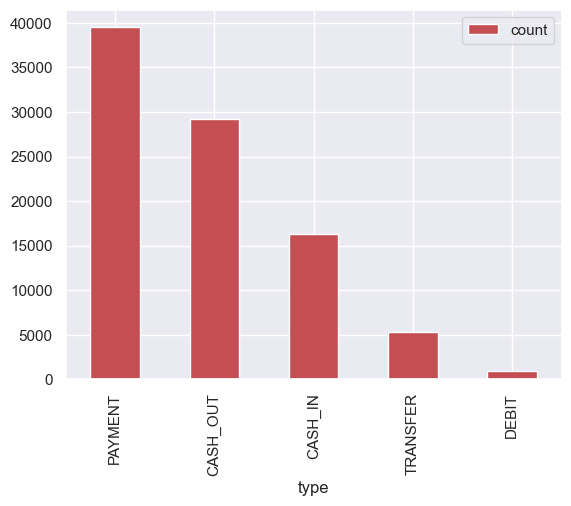

In [26]:
new_1_df['type'].value_counts().to_frame().plot(kind='bar',color='r')

From the above graph we can see most of the transactions were payments followed by cash_out

In [27]:
new_1_df.head()

,step,type,amount,isFraud,balanceOrig,balanceDest
0,1,PAYMENT,9839.64,0,-9839.64,1.0
1,1,PAYMENT,1864.28,0,-1864.28,1.0
2,1,TRANSFER,181.00,1,-181.00,1.0
3,1,CASH_OUT,181.00,1,-181.00,-21181.0
4,1,PAYMENT,11668.14,0,-11668.14,1.0


In [28]:
new_2_df = pd.get_dummies(new_1_df)

In [29]:
new_2_df.head()

,step,amount,isFraud,balanceOrig,balanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0,-9839.64,1.0,False,False,False,True,False
1,1,1864.28,0,-1864.28,1.0,False,False,False,True,False
2,1,181.00,1,-181.00,1.0,False,False,False,False,True
3,1,181.00,1,-181.00,-21181.0,False,True,False,False,False
4,1,11668.14,0,-11668.14,1.0,False,False,False,True,False


We will divide the dataset into features and target. Here isFraud is the target variable


In [30]:
X = new_2_df.drop(['isFraud'],axis=1)
y = new_2_df['isFraud']

we will scale the dataset, because it is more robust to outliers

<Axes: >

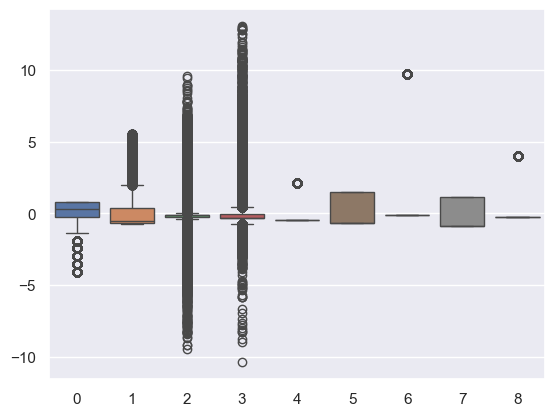

In [31]:
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix,f1_score

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
sns.boxplot(X_scaled)

In [32]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-4.075494,-0.673440,-0.232263,-0.313542,-0.466369,-0.685586,-0.103111,1.145472,-0.249469
1,-4.075494,-0.721844,-0.157435,-0.313542,-0.466369,-0.685586,-0.103111,1.145472,-0.249469
2,-4.075494,-0.732061,-0.141642,-0.313542,-0.466369,-0.685586,-0.103111,-0.873003,4.008516
3,-4.075494,-0.732061,-0.141642,-0.347749,-0.466369,1.458607,-0.103111,-0.873003,-0.249469
4,-4.075494,-0.662342,-0.249419,-0.313542,-0.466369,-0.685586,-0.103111,1.145472,-0.249469


Split into train and test ddataset

In [33]:
X_train, X_val,y_train,y_val = train_test_split(X_scaled,y,train_size=0.7,random_state=7)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,train_size=0.7,random_state=7)

In [34]:
X_train.shape, y_train.shape,X_val.shape,X_test.shape

((63944, 9), (63944,), (19183, 9), (8222, 9))

## Here we will do a quick modelling using Support Vector Classifier and check the scores

In [35]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [36]:
svc.score(X_val,y_val)

0.9988010217379972

In [37]:
y_pred = svc.predict(X_test)
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=[0,1])

,0,1
0,8208,0
1,14,0


In [46]:
f1_score(y_test, y_pred)

0.0

We can interpret from the above scores is that, The model predicts all of the non fraud values correctly but none of the fraud values correctly. While we require to predict most of the fraud as fraud, Otherwise the model has no relevance

This is happening due to the imbalance in the dataset. Because the majority and minority classes have huge disparity in their numbers

We will do a quick check for that

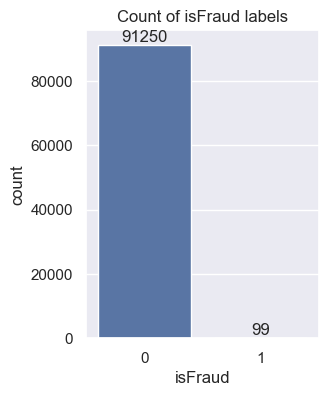

In [45]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data=new_2_df,x='isFraud')
plt.title("Count of isFraud labels")
for i in ax.containers:
    ax.bar_label(i,)

In [47]:
print('Genuine:', round(new_2_df['isFraud'].value_counts()[0]/len(new_2_df) * 100,2), '% of the dataset')
print('Frauds:', round(new_2_df['isFraud'].value_counts()[1]/len(new_2_df) * 100,2), '% of the dataset')

Genuine: 99.89 % of the dataset
Frauds: 0.11 % of the dataset


We can see that the model predicts non fraudulent transactions correctly, while none of the fraudulent transactions are correctly predicted

This has occured due to imbalanced majority and minority classes

For remedizing this situation we can use several methods and are as follows

Over/Undersample using Cross Validation

In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

fold = StratifiedKFold(n_splits=5, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, random_state=7)

### Metric to use
Out of all the popular metrics of classification like precision, recall and f1-score, we will choose the metric which measures the ability of the model to find all the relvant cases withing a dataset, In this case recall is the metric we will use

In [53]:
score = cross_val_score(clf, X_train, y_train, cv=fold, scoring='recall')
print("CV recall: {}".format(score))
print("mean CV recall: {}".format(score.mean()))

CV recall: [0.25       0.         0.23076923 0.61538462 0.16666667]
mean CV recall: 0.2525641025641026


Now checking with grid search cv

In [56]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(clf, param_grid=params, cv=fold, 
                          scoring='recall',versbose=True).fit(X_train, y_train)

In [57]:
print('Best parameters:', grid_rf.best_params_)
print('Best score:', grid_rf.best_score_)

Best parameters: {'max_depth': 12, 'n_estimators': 50, 'random_state': 13}
Best score: 0.2692307692307693


In [63]:
y_pred = grid_rf.best_estimator_.predict(X_val)  #check using validation data

In [64]:
print(confusion_matrix(y_val, y_pred))

[[19160     0]
 [   19     4]]


In [65]:
rf_Recall = recall_score(y_val, y_pred)
rf_Precision = precision_score(y_val, y_pred)
rf_f1 = f1_score(y_val, y_pred)
rf_accuracy = accuracy_score(y_val, y_pred)
ndf = [(rf_Recall, rf_Precision, rf_f1, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
rf_score.insert(0, 'Technique', 'No Under/Oversampling')
rf_score

,Technique,Recall,Precision,F1 Score,Accuracy
0,No Under/Oversampling,0.173913,1.0,0.296296,0.99901


### Random Oversampling

In [66]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=7)

X_ros,y_ros = ros.fit_resample(X_train, y_train)

In [67]:
print('Genuine:', y_ros.value_counts()[0], '/', round(y_ros.value_counts()[0]/len(y_ros) * 100,2), '% of the dataset')
print('Frauds:', y_ros.value_counts()[1], '/',round(y_ros.value_counts()[1]/len(y_ros) * 100,2), '% of the dataset')

Genuine: 63882 / 50.0 % of the dataset
Frauds: 63882 / 50.0 % of the dataset


In [68]:
from imblearn.pipeline import Pipeline, make_pipeline

random_overs_pipeline = make_pipeline(RandomOverSampler(random_state=16), 
                              RandomForestClassifier(n_estimators=100, random_state=16))

In [70]:
score2 = cross_val_score(random_overs_pipeline, X_train, y_train, scoring='recall', cv=fold)
print("Cross Validation Recall Scores are: {}".format(score2))
print("Average Cross Validation Recall score: {}".format(score2.mean()))

Cross Validation Recall Scores are: [0.33333333 0.         0.38461538 0.53846154 0.41666667]
Average Cross Validation Recall score: 0.33461538461538465


In [98]:
random_overs_pipeline.fit(X_train,y_train)
y_pred = random_overs_pipeline.predict(X_val)
ros_Recall = recall_score(y_val, y_pred)
ros_Precision = precision_score(y_val, y_pred)
ros_f1 = f1_score(y_val, y_pred)
ros_accuracy = accuracy_score(y_val, y_pred)

In [99]:
ndf = [(ros_Recall, ros_Precision, ros_f1, ros_accuracy)]

ros_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
ros_score.insert(0, 'Technique', 'ros oversampling')
ros_score

,Technique,Recall,Precision,F1 Score,Accuracy
0,ros oversampling,0.173913,0.5,0.258065,0.998801


# The recall score has improved slightly

Lets try smote

In [75]:
from imblearn.over_sampling import SMOTE

smote_pipeline = make_pipeline(SMOTE(random_state=7),RandomForestClassifier(n_estimators=100,random_state=7))

In [76]:
score3 = cross_val_score(smote_pipeline, X_train,y_train, scoring='recall',cv=fold)

In [77]:
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.41666667 0.5        0.53846154 0.69230769 0.5       ]
Average Cross Validation Recall score: 0.5294871794871796


Create a confusion matrix

In [84]:
smote_pipeline.fit(X_train,y_train)
y_pred = smote_pipeline.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

smote_rf_Recall = recall_score(y_val, y_pred)
smote_rf_Precision = precision_score(y_val, y_pred)
smote_rf_f1 = f1_score(y_val, y_pred)
smote_rf_accuracy = accuracy_score(y_val, y_pred)

print(cm)

[[19097    63]
 [   13    10]]


In [88]:
ndf = [(smote_rf_Recall, smote_rf_Precision, smote_rf_f1, smote_rf_accuracy)]

smote_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
smote_rf_score.insert(0, 'Technique', 'SMOTE Oversampling')
smote_rf_score

,Technique,Recall,Precision,F1 Score,Accuracy
0,SMOTE Oversampling,0.434783,0.136986,0.208333,0.996038


Using Tomek links to undersample

In [85]:
from imblearn.under_sampling import TomekLinks

# define the undersampling method
#tomekU = TomekLinks(sampling_strategy='auto', n_jobs=-1)
tomekU = TomekLinks()

# fit and apply the transform
X_underT, y_underT = tomekU.fit_resample(X_train, y_train)
print('Genuine:', y_underT.value_counts()[0], '/', round(y_underT.value_counts()[0]/len(y_underT) * 100,2), '% of the dataset')
print('Frauds:', y_underT.value_counts()[1], '/',round(y_underT.value_counts()[1]/len(y_underT) * 100,2), '% of the dataset')

Genuine: 63856 / 99.9 % of the dataset
Frauds: 62 / 0.1 % of the dataset


Combine SMOTE and Tomek links

In [89]:
from imblearn.combine import SMOTETomek

SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              RandomForestClassifier(n_estimators=100, random_state=13))
score4 = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=fold) 

print("Cross Validation Recall Scores are: {}".format(score4))
print("Average Cross Validation Recall score: {}".format(score4.mean()))

Cross Validation Recall Scores are: [0.5        0.5        0.53846154 0.76923077 0.5       ]
Average Cross Validation Recall score: 0.5615384615384615


In [93]:
SMOTETomek_pipeline.fit(X_train,y_train)
y_pred = SMOTETomek_pipeline.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

SMOTETomek_rf_Recall = recall_score(y_val, y_pred)
SMOTETomek_rf_Precision = precision_score(y_val, y_pred)
SMOTETomek_rf_f1 = f1_score(y_val, y_pred)
SMOTETomek_rf_accuracy = accuracy_score(y_val, y_pred)

print(cm)

[[19097    63]
 [   12    11]]


In [94]:
ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f1, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Technique', 'SMOTE + Tomek')
SMOTETomek_rf_score

,Technique,Recall,Precision,F1 Score,Accuracy
0,SMOTE + Tomek,0.478261,0.148649,0.226804,0.99609


Now we will compare all the methods we did so far

In [100]:
preds = pd.concat([rf_score,ros_score,smote_rf_score,SMOTETomek_rf_score],ignore_index=True,sort=False)
preds.sort_values(by=['Recall'],ascending=False)

,Technique,Recall,Precision,F1 Score,Accuracy
3,SMOTE + Tomek,0.478261,0.148649,0.226804,0.996090
2,SMOTE Oversampling,0.434783,0.136986,0.208333,0.996038
0,No Under/Oversampling,0.173913,1.000000,0.296296,0.999010
1,ros oversampling,0.173913,0.500000,0.258065,0.998801


### Clearly Smote+Tomek has the highest recall

We will now perform ROC-AUC curve to understand the probability and the degree or measure of separability

In [117]:
from sklearn.metrics import roc_auc_score

#we will take the predictions from the best technique
y_pred = SMOTETomek_pipeline.predict(X_test)
roc_score = roc_auc_score(y_test,y_pred)
print(f"Roc-auc score for the smotetomek is {roc_score: .2f}")

Roc-auc score for the smotetomek is  0.82


C:\Users\bagha\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


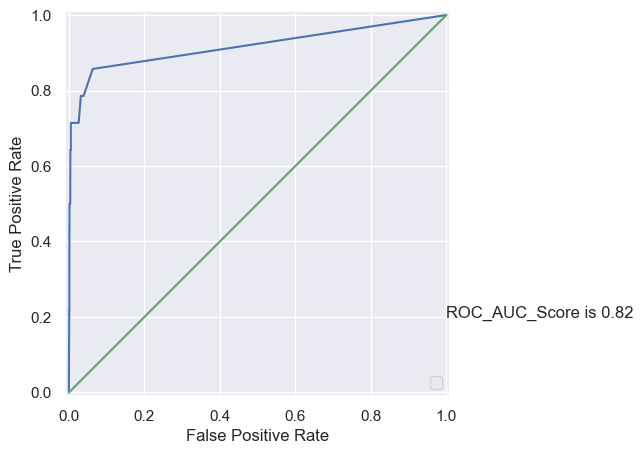

In [131]:
from sklearn.metrics import  roc_curve
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0,1],[0,1],color='g')

y_proba = SMOTETomek_pipeline.predict_proba(X_test)

plot_roc_curve(y_test,y_proba[:,1])
plt.annotate(f"ROC_AUC_Score is {roc_score:.2f}",xy=[1,0.2])
plt.show()

### This shows that the model has 82% chance to distinguish between the two classes

However we will try the SMOTETomek with XGBoost classifier instead of RandomForestClassifier and check, it it increases the recall

In [107]:
from xgboost import XGBClassifier

In [109]:
SMOTETomek_XGB = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='majority')), 
                              XGBClassifier(n_estimators=100, random_state=7))
y_pred = SMOTETomek_XGB.fit(X_train, y_train).predict(X_test)

smotetomek_xgb_recall = recall_score(y_test,y_pred)

print(f"Recall for SMOTETOMEK_XGB is {smotetomek_xgb_recall}")

Recall for SMOTETOMEK_XGB is 0.5714285714285714


In [111]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[8162   46]
 [   6    8]]


Check the ROC_AUC score for the smotetomek_xgb

In [120]:
print(f"ROC_AUC score for SMOTETomek_XGB is {roc_auc_score(y_pred, y_test):.4f}")

ROC_AUC score for SMOTETomek_XGB is 0.6043


### So with higher ROC_AUC score, SMOTETomek_rf is more reliable than the SMOTETomek_xgb